In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [176]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [177]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB


In [179]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
) 
df.head()

,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [180]:
df.shape

(9668, 8)

In [181]:
df['health_impacts'].isnull().sum()

np.int64(3180)

In [182]:
df.columns

Index(['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device',
       'exceeded_recommended_limit', 'educational_to_recreational_ratio',
       'health_impacts', 'urban_or_rural'],
      dtype='object')

In [183]:
df.describe()

,age,avg_daily_screen_time_hr,educational_to_recreational_ratio
count,9668.000000,9668.000000,9668.000000
mean,12.992760,4.367780,0.427028
std,3.158931,1.703002,0.073185
min,8.000000,0.000000,0.300000
25%,10.000000,3.427500,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [184]:
df.isnull().sum()

age                                     0
gender                                  0
avg_daily_screen_time_hr                0
primary_device                          0
exceeded_recommended_limit              0
educational_to_recreational_ratio       0
health_impacts                       3180
urban_or_rural                          0
dtype: int64

In [185]:
df['health_impacts'] = df['health_impacts'].fillna("No Health Impact")

In [186]:
df['health_impacts'].isnull().sum()

np.int64(0)

In [187]:
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

In [188]:
bins = [0,5,10,15,18]
labels = ['toddler','child','pre-teen','teen']

df['age_band'] = pd.cut(df['age'], bins=bins, labels=labels)

In [189]:
df.columns

Index(['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device',
       'exceeded_recommended_limit', 'educational_to_recreational_ratio',
       'health_impacts', 'urban_or_rural', 'age_band'],
      dtype='object')

In [190]:
bins = [5,10,13,16,18]
labels = ["6-10","11-13","14-16","17-18"]

df["Age_Band"] = pd.cut(
    df["age"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

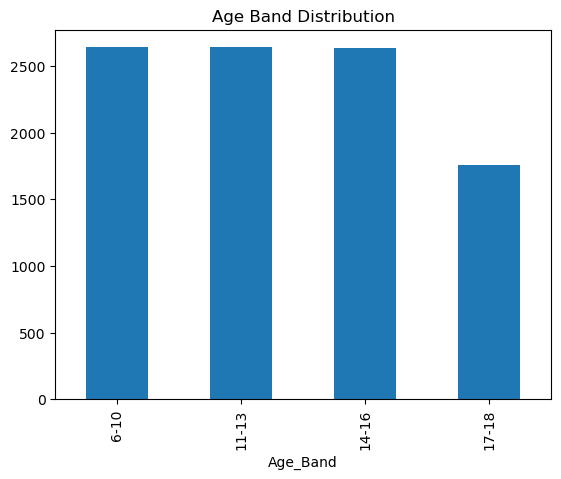

In [191]:
import matplotlib.pyplot as plt

plt.figure()
df["Age_Band"].value_counts().sort_index().plot(kind="bar")
plt.title("Age Band Distribution")
plt.show()

In [192]:
df["Day_Type"] = df["avg_daily_screen_time_hr"].apply(
    lambda x: "Weekend" if x >= 5 else "Weekday"
)

In [193]:
df['day_type'] = np.where(df['avg_daily_screen_time_hr']>4,'Weekend','Weekday')

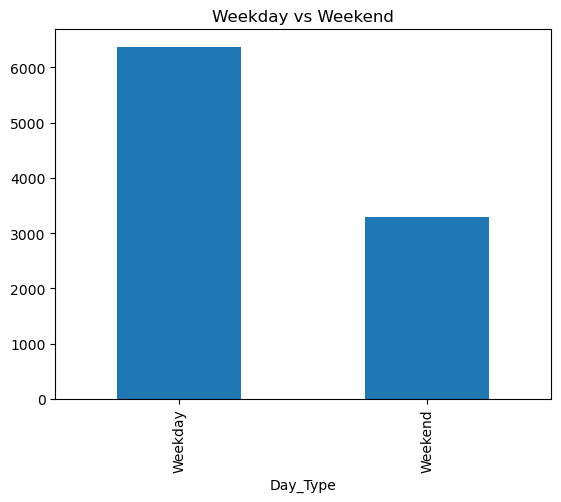

In [194]:
plt.figure()
df["Day_Type"].value_counts().plot(kind="bar")
plt.title("Weekday vs Weekend")
plt.show()

In [195]:
device_share = df['primary_device'].value_counts(normalize=True)

device_share

primary_device
Smartphone    0.469590
TV            0.256309
Laptop        0.148014
Tablet        0.126086
Name: proportion, dtype: float64

In [196]:
df['device_share'] = df['primary_device'].map(device_share)

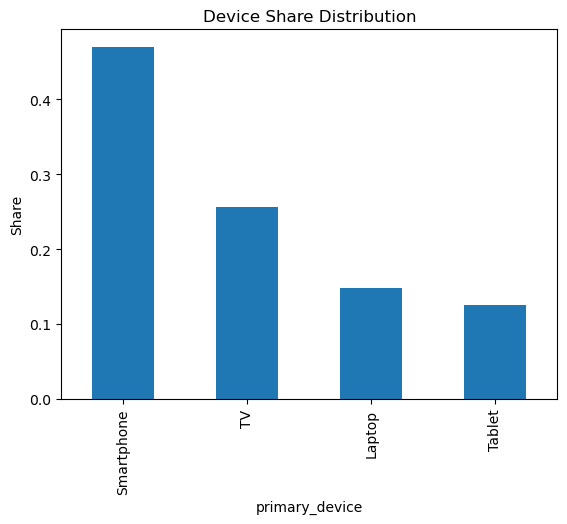

In [197]:
device_share.plot(kind='bar')
plt.title("Device Share Distribution")
plt.ylabel("Share")
plt.show()

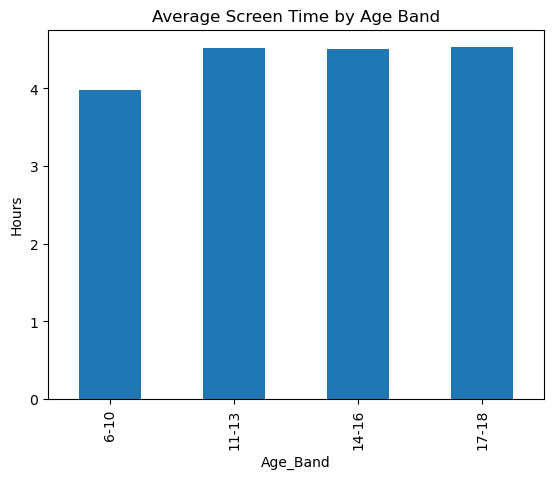

In [198]:
plt.figure()

df.groupby("Age_Band", observed=False)["avg_daily_screen_time_hr"].mean().plot(kind="bar")

plt.title("Average Screen Time by Age Band")
plt.ylabel("Hours")
plt.show()

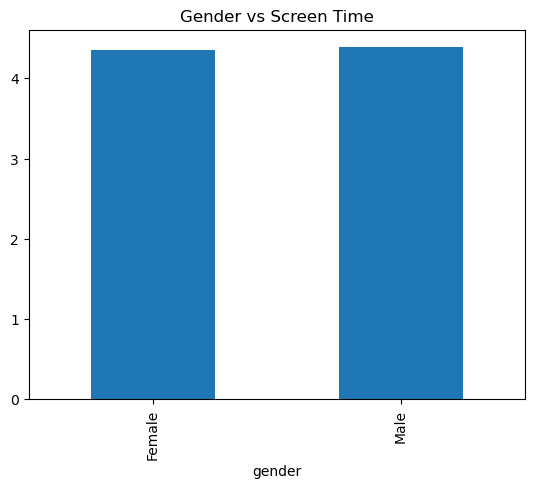

In [199]:
plt.figure()
df.groupby("gender")["avg_daily_screen_time_hr"].mean().plot(kind="bar")
plt.title("Gender vs Screen Time")
plt.show()

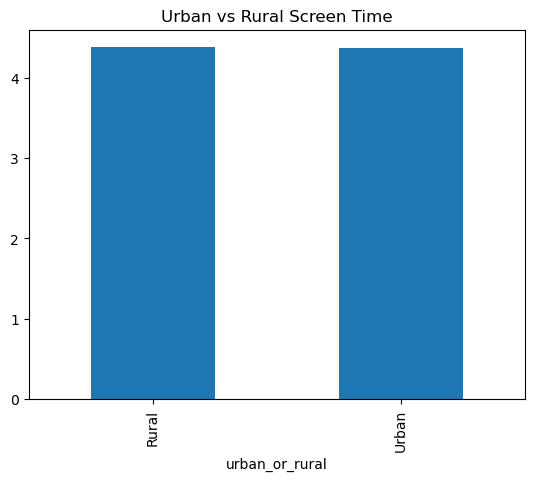

In [200]:
plt.figure()
df.groupby("urban_or_rural")["avg_daily_screen_time_hr"].mean().plot(kind="bar")
plt.title("Urban vs Rural Screen Time")
plt.show()

In [201]:
df['educational_share'] = df['educational_to_recreational_ratio'] / (1 + df['educational_to_recreational_ratio'])
df['recreational_share'] = 1 - df['educational_share']

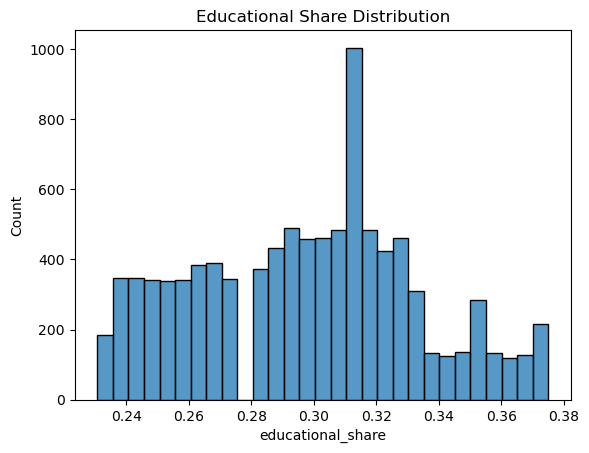

In [202]:
sns.histplot(df['educational_share'])
plt.title("Educational Share Distribution")
plt.show()

In [203]:
np.random.seed(42)
df['Day_Type'] = np.random.choice(['Weekday','Weekend'], size=len(df))

In [204]:
df.columns.tolist()

['age',
 'gender',
 'avg_daily_screen_time_hr',
 'primary_device',
 'exceeded_recommended_limit',
 'educational_to_recreational_ratio',
 'health_impacts',
 'urban_or_rural',
 'age_band',
 'Age_Band',
 'Day_Type',
 'day_type',
 'device_share',
 'educational_share',
 'recreational_share']

In [205]:
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'gender', 'avg_daily_screen_time_hr', 'primary_device',
       'exceeded_recommended_limit', 'educational_to_recreational_ratio',
       'health_impacts', 'urban_or_rural', 'age_band', 'Age_Band', 'Day_Type',
       'day_type', 'device_share', 'educational_share', 'recreational_share'],
      dtype='object')

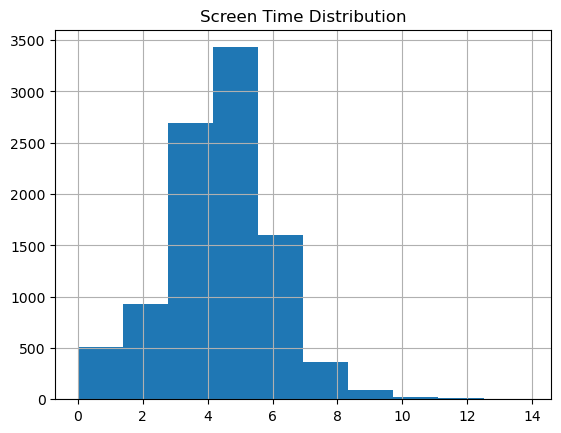

In [206]:
plt.figure()
df['avg_daily_screen_time_hr'].hist()
plt.title("Screen Time Distribution")
plt.show()

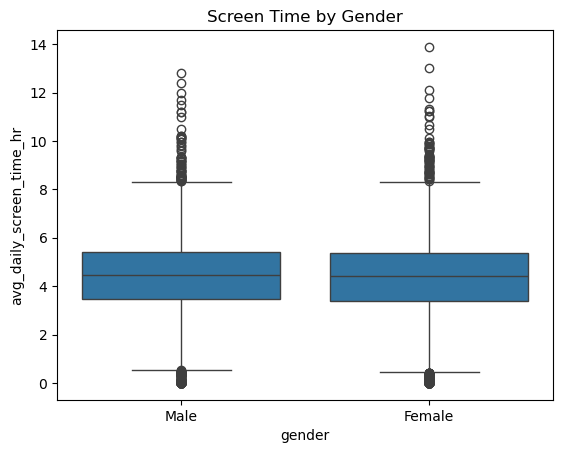

In [207]:
sns.boxplot(x='gender', y='avg_daily_screen_time_hr', data=df)
plt.title("Screen Time by Gender")
plt.show()

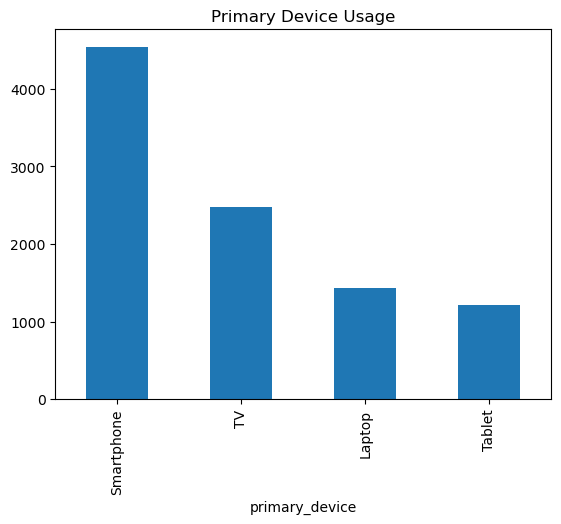

In [208]:
df['primary_device'].value_counts().plot(kind='bar')
plt.title("Primary Device Usage")
plt.show()

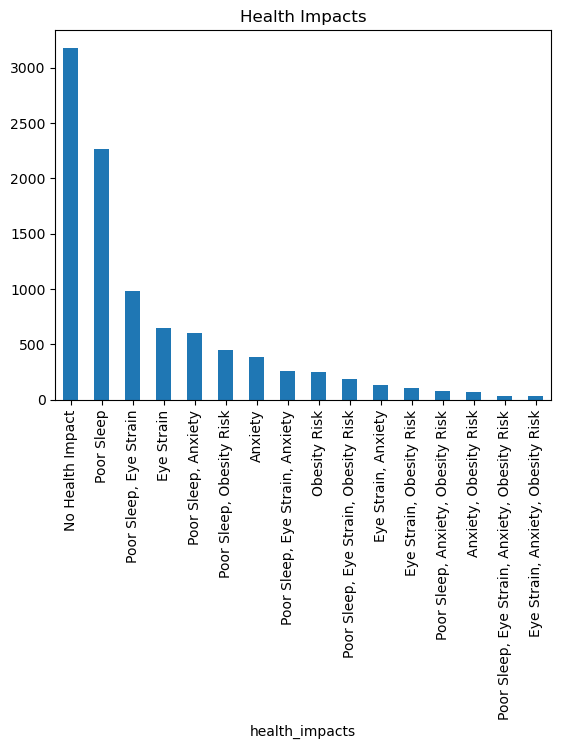

In [209]:
df['health_impacts'].value_counts().plot(kind='bar')
plt.title("Health Impacts")
plt.show()

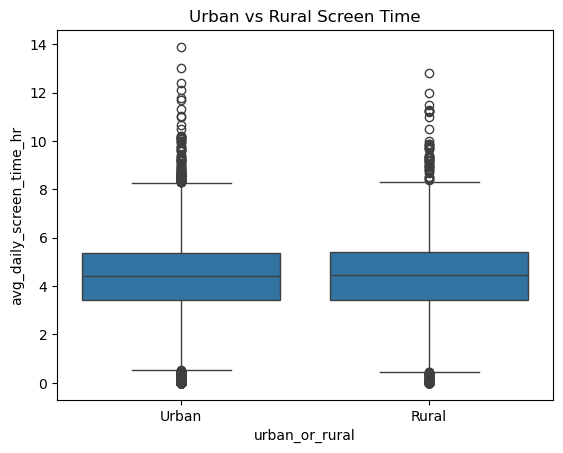

In [210]:
sns.boxplot(x='urban_or_rural', y='avg_daily_screen_time_hr', data=df)
plt.title("Urban vs Rural Screen Time")
plt.show()

In [211]:
df['screen_time_category'] = pd.cut(
    df['avg_daily_screen_time_hr'],
    bins=[0,2,4,6,10],
    labels=['Low','Moderate','High','Excessive']
)

In [212]:
df.to_csv("screentime_cleaned.csv", index=False)